## Recommendation Systme using AI


A Recommendation System combines several computational techniques to select personalized items based on the interests of users and according to the context in which they are inserted.

<center><img src="https://miro.medium.com/max/623/1*hQAQ8s0-mHefYH83uDanGA.gif"></center>


## Profile recommendation

For the profile, we use data from user profiles, that is, professions of interest, areas of interest, location and age (for filtering).

## How?
<center><img src="https://miro.medium.com/max/484/1*Tt6a01VofqCLd8YGJvgNKA.png"></center>



<center><img src="https://miro.medium.com/max/4056/1*KBriLd3AYrLuULCqdffxCQ.png"  width="600" height="300"></center>


In [323]:
import pandas as pd

cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv("u.user", names=cols, delimiter="|")

In [324]:
users.head(20).style.background_gradient(cmap='Blues')

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


In [325]:
import pgeocode

nomi = pgeocode.Nominatim('us')

for index, zipcode in zip(users.index, users["zip_code"]):
  state = nomi.query_postal_code(zipcode)["state_name"]
  users.at[index, 'zip_code'] = state

In [326]:
users.head(15).style.hide_index().background_gradient(cmap='Accent')

user_id,age,sex,occupation,zip_code
1,24,M,technician,Arizona
2,53,F,other,California
3,23,M,writer,Florida
4,24,M,technician,Ohio
5,33,F,other,Pennsylvania
6,42,M,executive,Washington
7,57,M,administrator,California
8,36,M,administrator,Vermont
9,29,M,student,Massachusetts
10,53,M,lawyer,California


## Acrescentando item de verificação

Aqui acrescentamos uma coluna chamada **is_working**. Ela é usada para verificar se o perfil já tem um trabalho (alocado no mercado de trabalho) ou não.

In [327]:
users["is_working"] = 'NaN'

for i, occ in zip(users.index, users["occupation"]):
    if occ == "student" or occ == "other":
        users.at[i, "is_working"] = "no"
    else:
        users.at[i, "is_working"] = "yes"

In [328]:
users.head(15).style.hide_index().background_gradient(cmap='Accent')

user_id,age,sex,occupation,zip_code,is_working
1,24,M,technician,Arizona,yes
2,53,F,other,California,no
3,23,M,writer,Florida,yes
4,24,M,technician,Ohio,yes
5,33,F,other,Pennsylvania,no
6,42,M,executive,Washington,yes
7,57,M,administrator,California,yes
8,36,M,administrator,Vermont,yes
9,29,M,student,Massachusetts,no
10,53,M,lawyer,California,yes


## Show database

In [329]:
import seaborn as sns
from matplotlib import pyplot

sns.set_theme(style="darkgrid")

### Profile by occupation

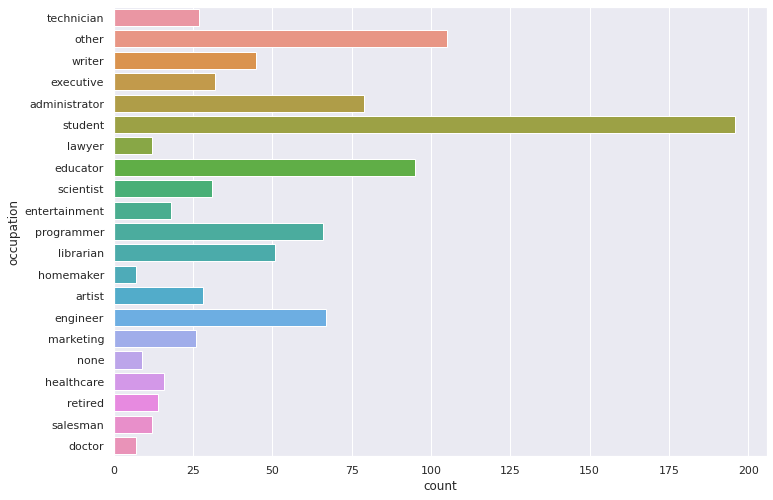

In [330]:
fig, ax = pyplot.subplots(figsize=(11.7, 8.27))
ax = sns.countplot(y="occupation", data=users)

### Profiles with occupation X Profiles without occupation

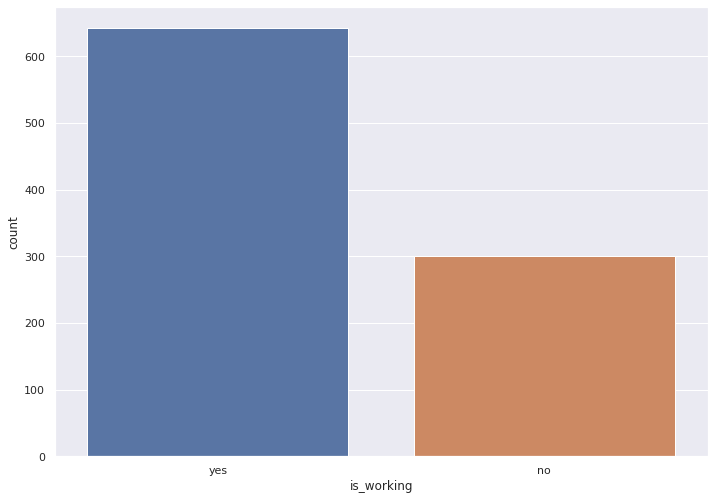

In [331]:
fig, ax = pyplot.subplots(figsize=(11.7, 8.27))
ax = sns.countplot(x="is_working", data=users)

### Profiles by location

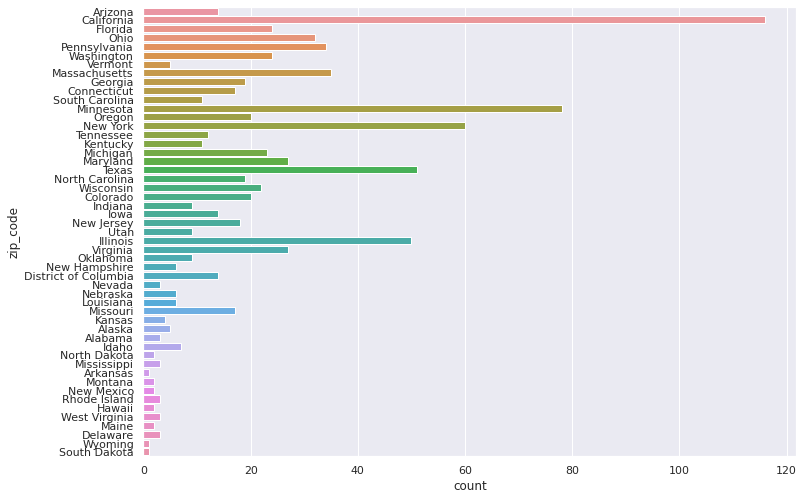

In [332]:
fig, ax = pyplot.subplots(figsize=(11.7, 8.27))
ax = sns.countplot(y="zip_code", data=users)

In [333]:
users = users.dropna()

In [334]:
users_encoder = users.apply(preprocessing.LabelEncoder().fit_transform)

In [335]:
users_encoder.shape

(906, 6)

## Recommendation System using KMeans



<center><img src="https://d3i71xaburhd42.cloudfront.net/331d55e3d600970b017709db9ccb46a43aa3b377/2-Figure2-1.png"></center>

In [336]:
kmeans = KMeans(n_clusters=8, init = 'k-means++', max_iter = 500, n_init = 10, random_state = 0)
kmeans.fit(users_encoder[["age", "sex", "occupation", "zip_code"]])
clusters = kmeans.fit_predict(users_encoder[["age", "sex", "occupation", "zip_code"]])

In [337]:
relation = pd.DataFrame(columns=['user_id', 'Cluster'])

In [338]:
index = 0
for user_id, cluster in zip(users_encoder["user_id"], clusters):
    relation.at[index, "user_id"] = user_id 
    relation.at[index, "Cluster"] = cluster

    index += 1

## Clusters by user

In [339]:
relation.T.head(906)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905
user_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905
Cluster,0,2,0,6,1,4,2,1,3,2,7,0,4,5,4,1,0,1,5,2,0,3,5,7,5,5,7,3,2,3,1,6,6,5,3,0,3,6,5,5,...,4,3,0,0,5,0,5,4,1,6,2,6,5,2,0,5,6,7,6,7,1,3,5,3,3,4,3,2,2,3,4,5,0,4,5,0,5,6,4,6


In [340]:
for index in range(10):
    len_users = relation[relation['Cluster'] == index].shape[0]
    print('Número de usuários (perfis) no Cluster ' + str(index) + ' ----> ', len_users)

Número de usuários (perfis) no Cluster 0 ---->  112
Número de usuários (perfis) no Cluster 1 ---->  124
Número de usuários (perfis) no Cluster 2 ---->  109
Número de usuários (perfis) no Cluster 3 ---->  125
Número de usuários (perfis) no Cluster 4 ---->  100
Número de usuários (perfis) no Cluster 5 ---->  110
Número de usuários (perfis) no Cluster 6 ---->  123
Número de usuários (perfis) no Cluster 7 ---->  103
Número de usuários (perfis) no Cluster 8 ---->  0
Número de usuários (perfis) no Cluster 9 ---->  0


In [341]:
kmeans.cluster_centers_

array([[14.40178571,  0.72321429, 16.5625    ,  7.07142857],
       [21.14516129,  0.77419355,  7.47580645, 37.97580645],
       [41.85321101,  0.69724771,  8.60550459,  9.14678899],
       [13.688     ,  0.704     , 14.84      , 21.568     ],
       [40.17      ,  0.64      ,  7.66      , 40.36      ],
       [30.60909091,  0.69090909,  8.79090909, 23.73636364],
       [13.11382114,  0.71544715, 16.99186992, 40.16260163],
       [21.66019417,  0.69902913,  4.7961165 ,  7.22330097]])

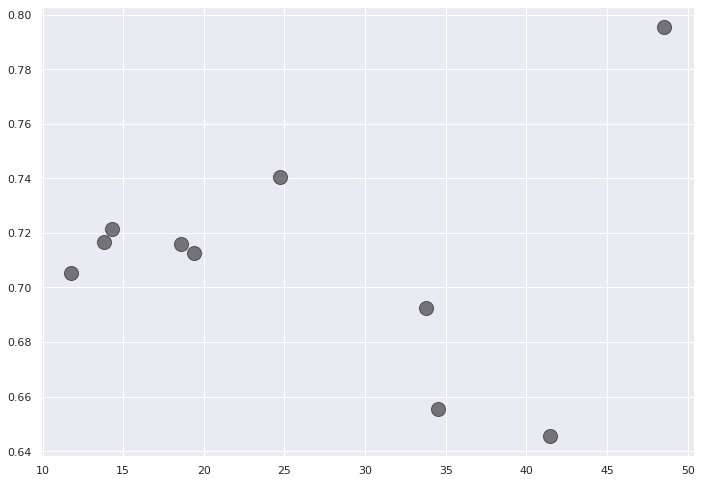

In [342]:
fig, ax = pyplot.subplots(figsize=(11.7, 8.27))
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

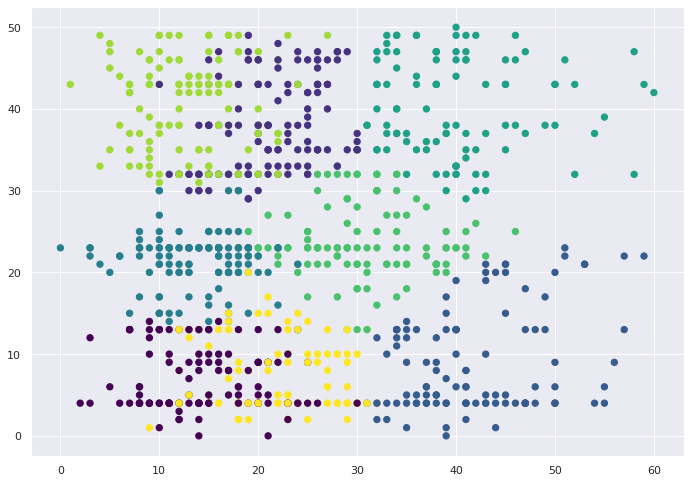

In [343]:
fig, ax = pyplot.subplots(figsize=(11.7, 8.27))

y_kmeans = kmeans.predict(users_encoder[["age", "sex", "occupation", "zip_code"]])
plt.scatter(users_encoder["age"], users_encoder["zip_code"],  c=y_kmeans, s=40, cmap='viridis')